<a href="https://colab.research.google.com/github/mr7495/Sperm_detection_and_tracking/blob/master/RetinaNet_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi #show GPU if one is enabled

In [0]:
!pip install git+https://github.com/mr7495/RetinaNet_Motile_objects_Detection --upgrade #Install RetinaNet as a library

In [21]:
!git clone https://github.com/mr7495/RetinaNet_Motile_objects_Detection #Clone the data on colab runtime

Cloning into 'RetinaNet_Motile_objects_Detection'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 128 (delta 17), reused 0 (delta 0), pack-reused 83
Receiving objects: 100% (128/128), 646.23 KiB | 5.05 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [0]:
cd RetinaNet_Motile_objects_Detection

In [0]:
!python setup.py build_ext --inplace

In [0]:
cd ..

In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
from google.colab.patches import cv2_imshow
# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

In [0]:
#!python RetinaNet_Motile_objects_Detection/keras_retinanet/bin/convert_model.py 'path to trained model' 'model.h5' 
#Use this code only if you have a trained model and want to convert it to a inference model for testing
#Our trained RetinaNet for detecting sperms based on 3 consecutive frames is free to use on:
#https://drive.google.com/open?id=1pN3A-tWJOphRdTZ7cPhJTnTIhoiGrcWv
#Download it and save it as model.h5

In [0]:
model_path = 'model.h5' #Path to inference model

# load retinanet model

model = models.load_model(model_path)
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'Sperm'}

processing time:  0.1310741901397705


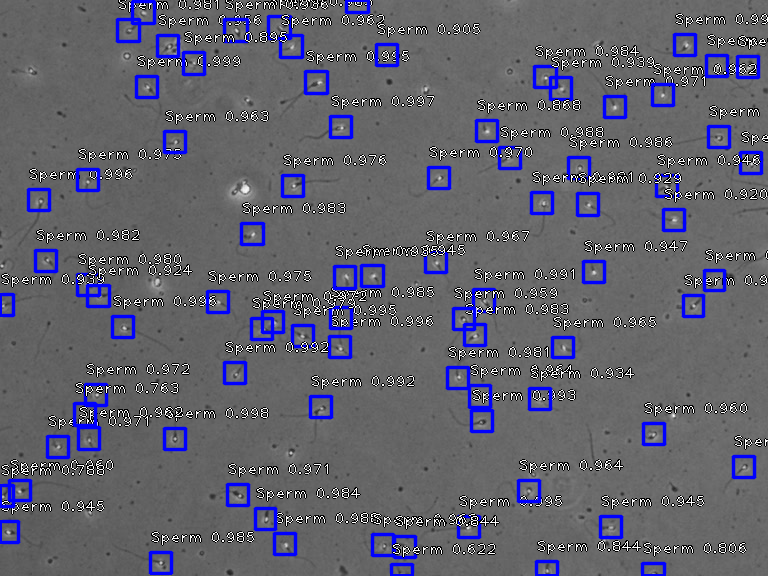

True

In [22]:
img1 = read_image_bgr('RetinaNet_Motile_objects_Detection/previous_frame.jpg') #Load Previous Frame
img2 = read_image_bgr('RetinaNet_Motile_objects_Detection/Current_frame.jpg') #Load Current Frame
img3 = read_image_bgr('RetinaNet_Motile_objects_Detection/next_frame.jpg') #Load next Frame
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #convert to gray scale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #convert to gray scale
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY) #convert to gray scale
image=np.concatenate((np.expand_dims(img1,axis=2),np.expand_dims(img2,axis=2),np.expand_dims(img3,axis=2)),axis=2) #concatenate 3 consecutive frames

draw = read_image_bgr('RetinaNet_Motile_objects_Detection/Current_frame.jpg') #the original current frame image

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale


# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score<0.5:
      break
 
    color = (255,0,0)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
cv2_imshow(draw)
cv2.imwrite('detected.jpg',draw)